In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.width', 500)

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
X = df.drop('Attrition', axis=1)
y = df['Attrition'].map({'No': 0, 'Yes': 1})

In [9]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [10]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


### Split into Numeric & categorical

In [11]:
numeric_features = [f for f in X.columns if X.dtypes[f] != 'object']
categorical_features = [f for f in X.columns if X.dtypes[f] == 'object']

print(numeric_features)
print(categorical_features)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


## Visualizations

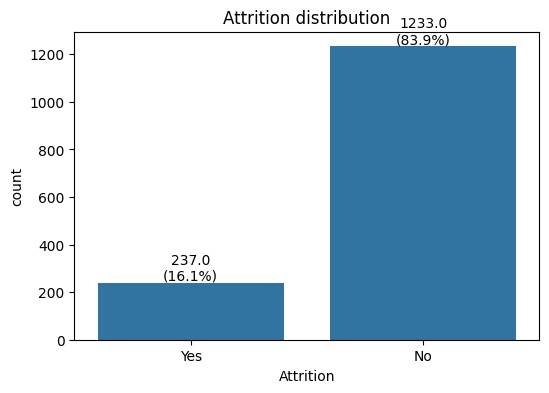

In [12]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Attrition')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}\n({height/len(df):.1%})',
                (p.get_x()+p.get_width()/2., height),
                ha='center', va='bottom')
plt.title('Attrition distribution')
plt.show()

### Observation:
heavy skew (look like ~84:16). we later use SMOTE technique for handling this.

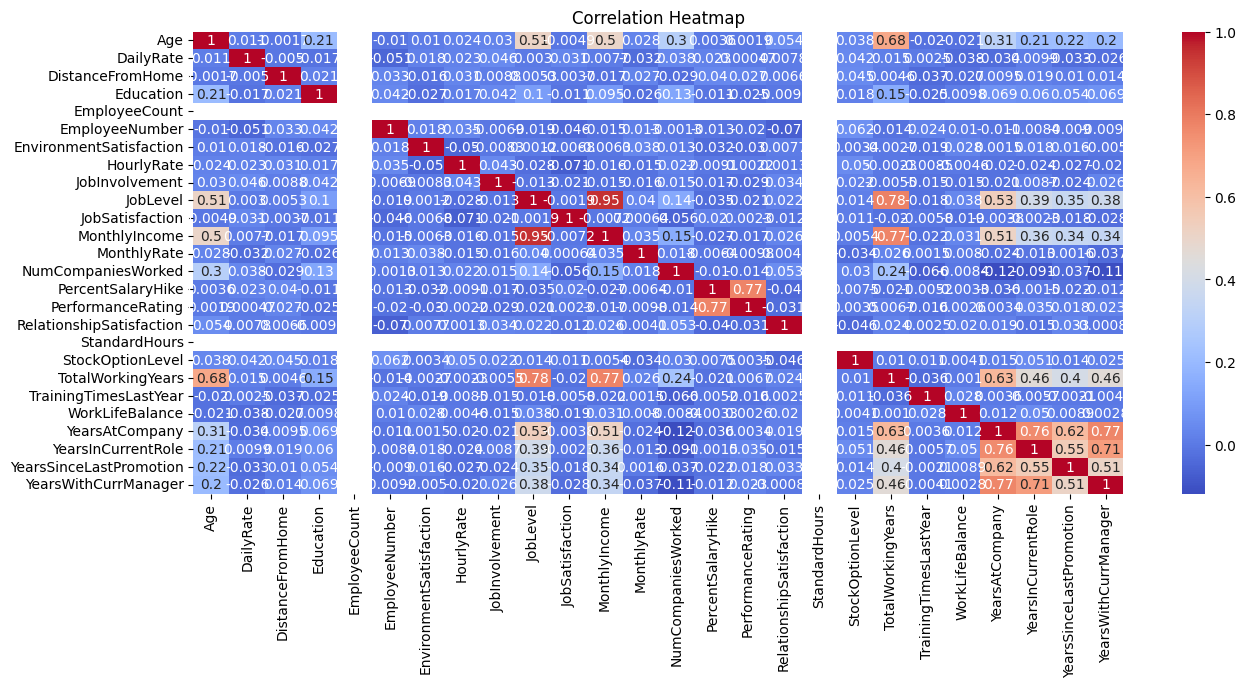

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(X[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Correlation matrix in percentage (not plot)
corr_percent = X[numeric_features].corr() * 100

# Round to 2 decimal places for readability
corr_percent = corr_percent.round(2)

# Display as normal table
print(corr_percent)

                             Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
Age                       100.00       1.07             -0.17      20.80            NaN           -1.01                     1.01        2.43            2.98     50.96            -0.49          49.79         2.81               29.96               0.36               0.19                      5.35            NaN              3.75              68.04                  -1.96            -2.15           31.13               21.29                    21.65                 20.21
DailyRate                   1.07     100.00             -0

## Observation:
- acc to corr droping EmployeeNumber EmployeeCount, StandardHours, Over18 bcoz non-informative
- dropping JobLevel, YearsWithCurrManager bcoz redundant
- keeping this value defalut:\
  DailyRate, MonthlyRate,(random value)\
  PerformanceRating(constant=3), PercentSalaryHike(low importance)
- important numeric features:\
    Age, DistanceFromHome, Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, MaritalStatus, OverTime, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, WorkLifeBalance, plus key categoricals

In [15]:
X = X.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18', 'JobLevel', 'YearsWithCurrManager'], axis=1)

In [16]:
numeric_features = [f for f in X.columns if X.dtypes[f] != 'object']
categorical_features = [f for f in X.columns if X.dtypes[f] == 'object']

print(numeric_features)
print(categorical_features)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


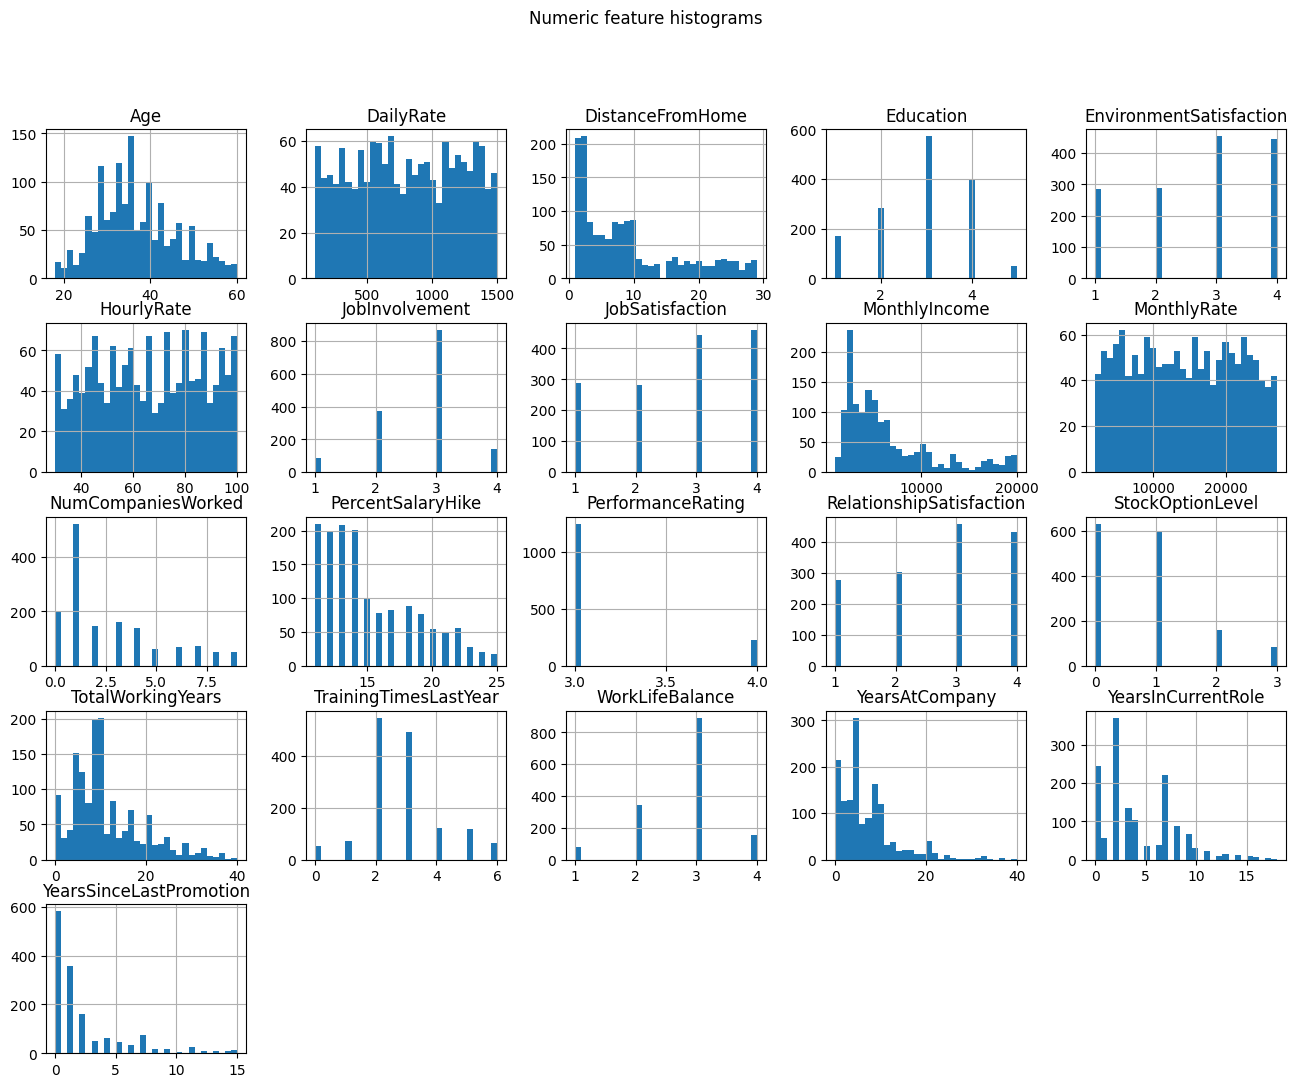

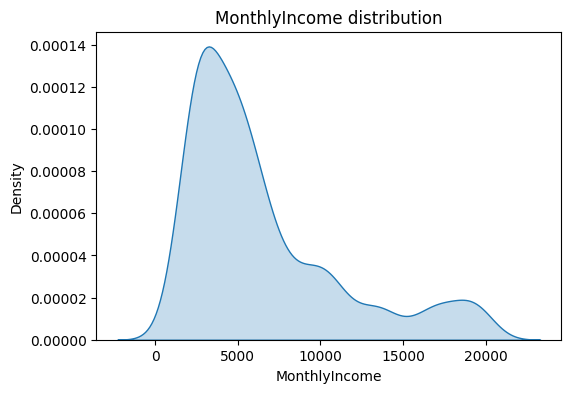

In [17]:
X[numeric_features].hist(bins=30, figsize=(16,12))
plt.suptitle('Numeric feature histograms')
plt.show()

# single KDE example
plt.figure(figsize=(6,4))
sns.kdeplot(X['MonthlyIncome'], fill=True)
plt.title('MonthlyIncome distribution')
plt.show()

## Observations:
Some features are normally distributed (like Age).

Some are categorical disguised as numeric (like JobSatisfaction).

Some are heavily skewed (like MonthlyIncome or TotalWorkingYears).


=== BusinessTravel ===
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


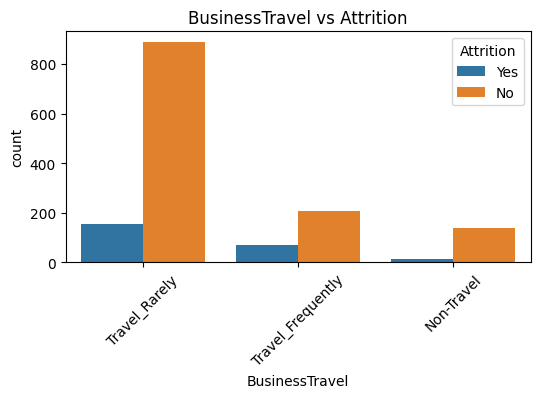


=== Department ===
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


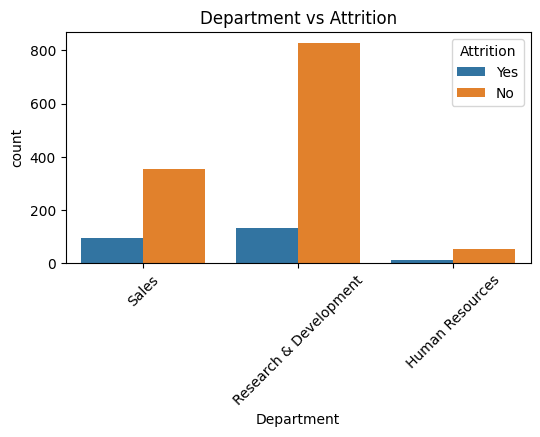


=== EducationField ===
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


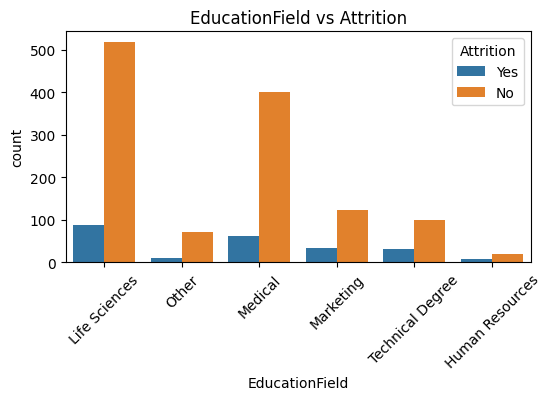


=== Gender ===
Gender
Male      882
Female    588
Name: count, dtype: int64


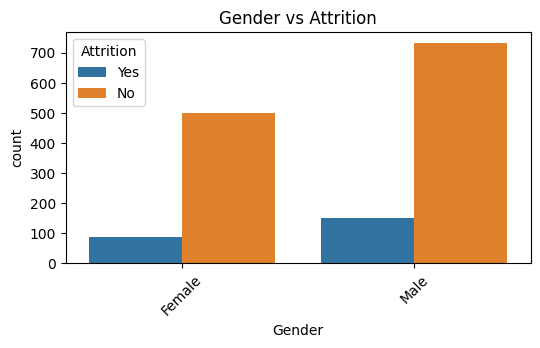


=== JobRole ===
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


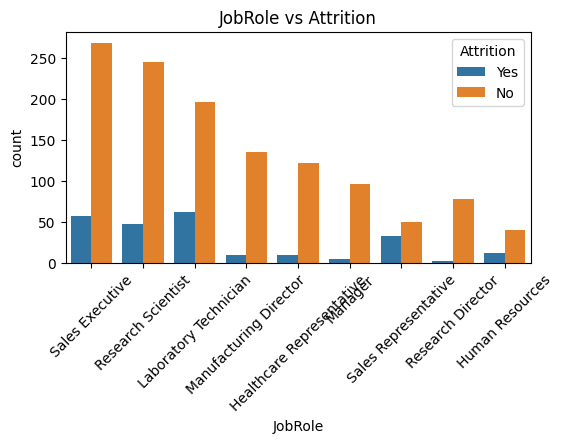


=== MaritalStatus ===
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


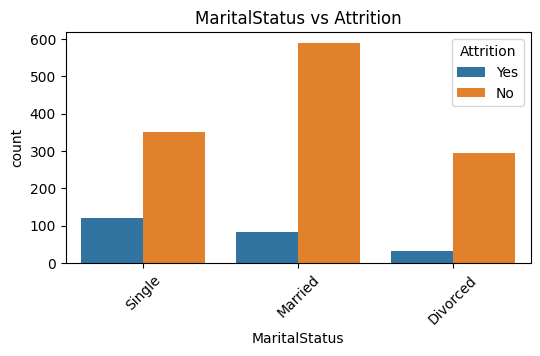


=== OverTime ===
OverTime
No     1054
Yes     416
Name: count, dtype: int64


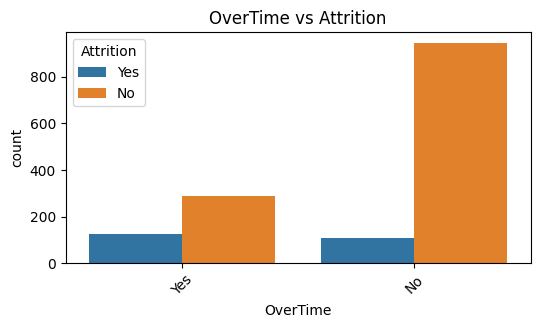

In [18]:
for col in categorical_features:
    vc = X[col].value_counts()
    print(f"\n=== {col} ===")
    print(vc)
    # optional plot
    # Attrition vs each categorical feature
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.show()


In [19]:
for col in categorical_features:
    attrition_rate = df.groupby(col)['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
    print(f"\n=== {col} ===")
    print(attrition_rate.round(2))


=== BusinessTravel ===
Attrition             No    Yes
BusinessTravel                 
Non-Travel         92.00   8.00
Travel_Frequently  75.09  24.91
Travel_Rarely      85.04  14.96

=== Department ===
Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63

=== EducationField ===
Attrition            No    Yes
EducationField                
Human Resources   74.07  25.93
Life Sciences     85.31  14.69
Marketing         77.99  22.01
Medical           86.42  13.58
Other             86.59  13.41
Technical Degree  75.76  24.24

=== Gender ===
Attrition     No    Yes
Gender                 
Female     85.20  14.80
Male       82.99  17.01

=== JobRole ===
Attrition                     No    Yes
JobRole                                
Healthcare Representative  93.13   6.87
Human Resources            76.92  23.08
Laboratory Technician      76.06  23.94
Manager   

In [20]:
df.groupby('Attrition')[numeric_features].mean().round(2).T

Attrition,No,Yes
Age,37.56,33.61
DailyRate,812.50,750.36
DistanceFromHome,8.92,10.63
Education,2.93,2.84
EnvironmentSatisfaction,2.77,2.46
HourlyRate,65.95,65.57
JobInvolvement,2.77,2.52
JobSatisfaction,2.78,2.47
MonthlyIncome,6832.74,4787.09
MonthlyRate,14265.78,14559.31


## split data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Preprocessing
### Handling features

In [22]:
# --- Feature groups ---
continuous_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
    'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'PercentSalaryHike'
]

rating_features = [
    'JobSatisfaction', 'PerformanceRating',
    'EnvironmentSatisfaction', 'RelationshipSatisfaction',
    'JobInvolvement', 'NumCompaniesWorked',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'StockOptionLevel'
]

categorical_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime'
]

# Filter to keep existing columns only
continuous_features = [f for f in continuous_features if f in X.columns]
rating_features = [f for f in rating_features if f in X.columns]
categorical_features = [f for f in categorical_features if f in X.columns]

# --- Preprocessing ---
scaler_encoder = ColumnTransformer(transformers=[
    ('cont', StandardScaler(), continuous_features),
    ('rate', MinMaxScaler(), rating_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
], remainder='drop')  # or 'passthrough' if you want to keep others

# Fit-transform only on training data
X_train_prep = scaler_encoder.fit_transform(X_train)
X_test_prep = scaler_encoder.transform(X_test)

## Handling imbalanced dataset
### Because Attrition,
No:    84\
Yes:  16

In [23]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_prep, y_train)

print("Before SMOTE:", y_train.value_counts(normalize=True))
print("After SMOTE:", y_train_res.value_counts(normalize=True))

Before SMOTE: Attrition
0    0.838435
1    0.161565
Name: proportion, dtype: float64
After SMOTE: Attrition
0    0.5
1    0.5
Name: proportion, dtype: float64


## Model Evaluation

## try other classifier

Model	Metric:\
RandomForest	F1/Recall	—	0.23\
Logistic Regression	ROC-AUC	0.81\
XGBoost	ROC-AUC	0.9218 \
LightGBM	ROC-AUC	0.9045

after this i finalize xgboost

### Xgboost

In [24]:
xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test_prep)

print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:10:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.61      0.23      0.34        47

    accuracy                           0.85       294
   macro avg       0.74      0.60      0.63       294
weighted avg       0.83      0.85      0.83       294

Confusion Matrix:
 [[240   7]
 [ 36  11]]


### Hyperparameter

In [25]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold

f1_scorer = make_scorer(f1_score)


param_grid_xgb = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_xgb,
    n_iter=20,
    scoring=f1_scorer,
    cv=cv,
    verbose=1,
    random_state=42
)

grid_xgb.fit(X_train_res, y_train_res)

print("Best Params (XGBoost):", grid_xgb.best_params_)
print("Best F1-score:", grid_xgb.best_score_)

best_model = grid_xgb.best_estimator_
y_pred_xgb = best_model.predict(X_test_prep)

print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:10:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:10:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:10:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:10:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:10:31] WARNING: /w

Best Params (XGBoost): {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best F1-score: 0.9330756727807217
XGBoost Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       247
           1       0.68      0.28      0.39        47

    accuracy                           0.86       294
   macro avg       0.78      0.63      0.66       294
weighted avg       0.85      0.86      0.84       294

Confusion Matrix:
 [[241   6]
 [ 34  13]]


In [26]:
best_model = grid_xgb.best_estimator_

y_pred = best_model.predict(X_test_prep)
y_prob = best_model.predict_proba(X_test_prep)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Test F1-score:", f1_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       247
           1       0.68      0.28      0.39        47

    accuracy                           0.86       294
   macro avg       0.78      0.63      0.66       294
weighted avg       0.85      0.86      0.84       294

Test F1-score: 0.3939393939393939
Test ROC-AUC: 0.7855112412783186
Confusion Matrix:
 [[241   6]
 [ 34  13]]


In [27]:
from joblib import dump

# Save both the preprocessing transformer and the best model into one file
dump((scaler_encoder, best_model), 'preprocessor_xgb_pipeline.joblib')

['preprocessor_xgb_pipeline.joblib']

In [28]:
import pandas as pd

# 1️⃣ Get encoded feature names from ColumnTransformer
# (This combines all numeric + categorical transformed columns)
encoded_feature_names = []

# Continuous and rating features
encoded_feature_names.extend(continuous_features)
encoded_feature_names.extend(rating_features)

# For categorical features → get OHE expanded column names
ohe = scaler_encoder.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)
encoded_feature_names.extend(ohe_feature_names)

# 2️⃣ Convert preprocessed arrays to DataFrames
X_train_res_df = pd.DataFrame(X_train_res, columns=encoded_feature_names)
y_train_res_df = pd.DataFrame(y_train_res, columns=['Attrition'])

# 3️⃣ Merge features and target into one dataset
preprocessed_clean_data = pd.concat([X_train_res_df, y_train_res_df], axis=1)

# 4️⃣ Save to CSV
preprocessed_clean_data.to_csv('preprocessed_clean_data.csv', index=False)

print("✅ Preprocessed data saved as 'preprocessed_clean_data.csv'")
print("Shape:", preprocessed_clean_data.shape)


✅ Preprocessed data saved as 'preprocessed_clean_data.csv'
Shape: (1972, 42)
